In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
data = pd.read_csv("D:\Research Internship\Programs\Datasets\FertilizerPrediction.csv")
print(data)
data.describe()

    Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  \
0            26         52        38     Sandy      Maize        37   
1            29         52        45     Loamy  Sugarcane        12   
2            34         65        62     Black     Cotton         7   
3            32         62        34       Red    Tobacco        22   
4            28         54        46    Clayey      Paddy        35   
..          ...        ...       ...       ...        ...       ...   
94           25         50        32    Clayey     Pulses        24   
95           30         60        27       Red    Tobacco         4   
96           38         72        51     Loamy      Wheat        39   
97           36         60        43     Sandy    Millets        15   
98           29         58        57     Black  Sugarcane        12   

    Potassium  Phosphorous Fertilizer Name  
0           0            0            Urea  
1           0           36             DAP  
2           

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [85]:
data.isnull().any()

Temparature        False
Humidity           False
Moisture           False
Soil Type          False
Crop Type          False
Nitrogen           False
Potassium          False
Phosphorous        False
Fertilizer Name    False
dtype: bool

###### No Null or missing values founded 

In [86]:
crops = data['Crop Type'].unique()
soilType = data['Soil Type'].unique()
fertilizers = data['Fertilizer Name'].unique()
print(crops, "\nNumber of Different types of crops: ", len(crops))
print(soilType, "\nNumber of Different types of Soil: ", len(soilType))
print(fertilizers, "\nNumber of Different types of Fertilizers: ", len(fertilizers))

['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts'] 
Number of Different types of crops:  11
['Sandy' 'Loamy' 'Black' 'Red' 'Clayey'] 
Number of Different types of Soil:  5
['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26'] 
Number of Different types of Fertilizers:  7


<Axes: xlabel='Soil Type', ylabel='count'>

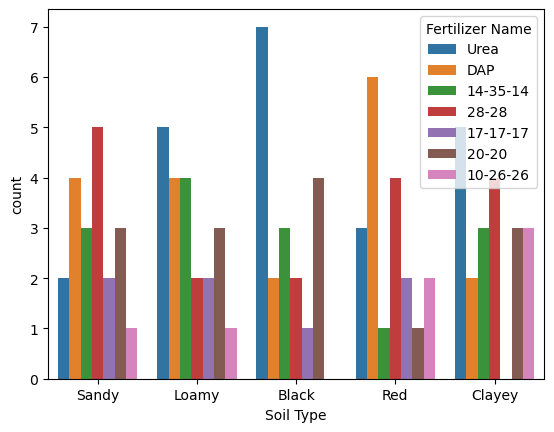

In [87]:
sns.countplot(x='Soil Type', data = data,hue="Fertilizer Name")

<Axes: xlabel='Fertilizer Name', ylabel='count'>

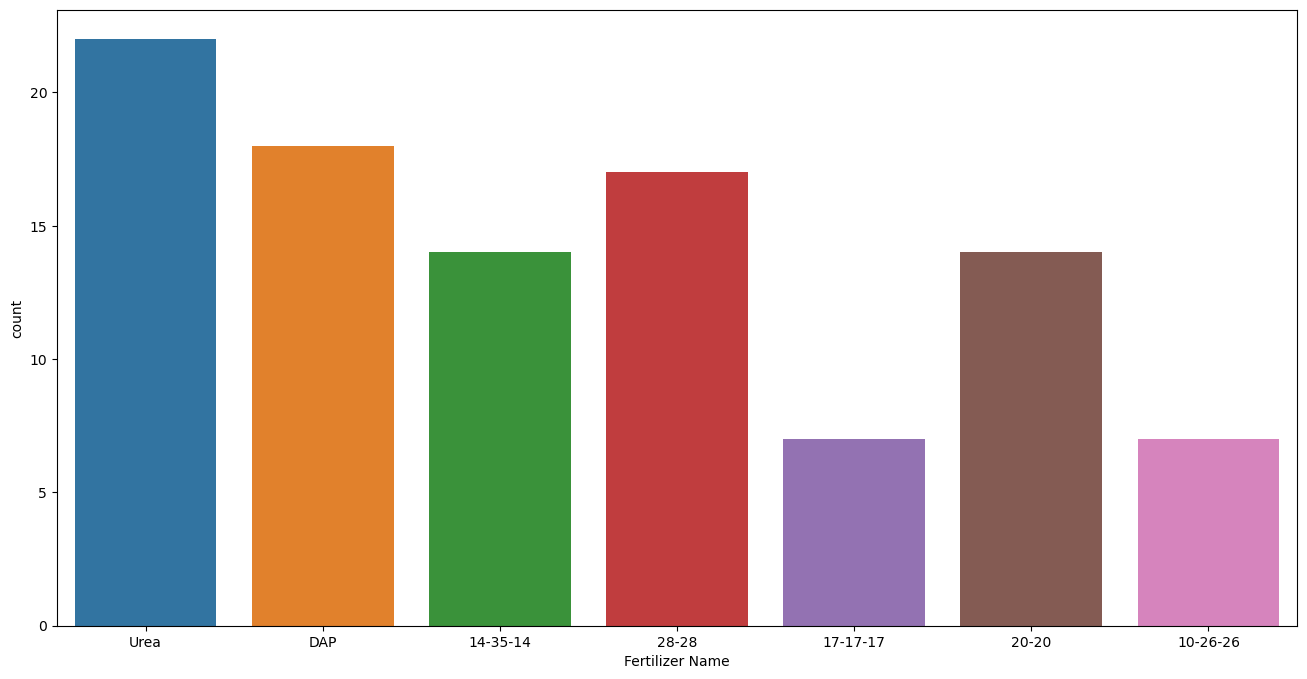

In [88]:
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer Name',data = data)


<Axes: xlabel='Crop Type', ylabel='count'>

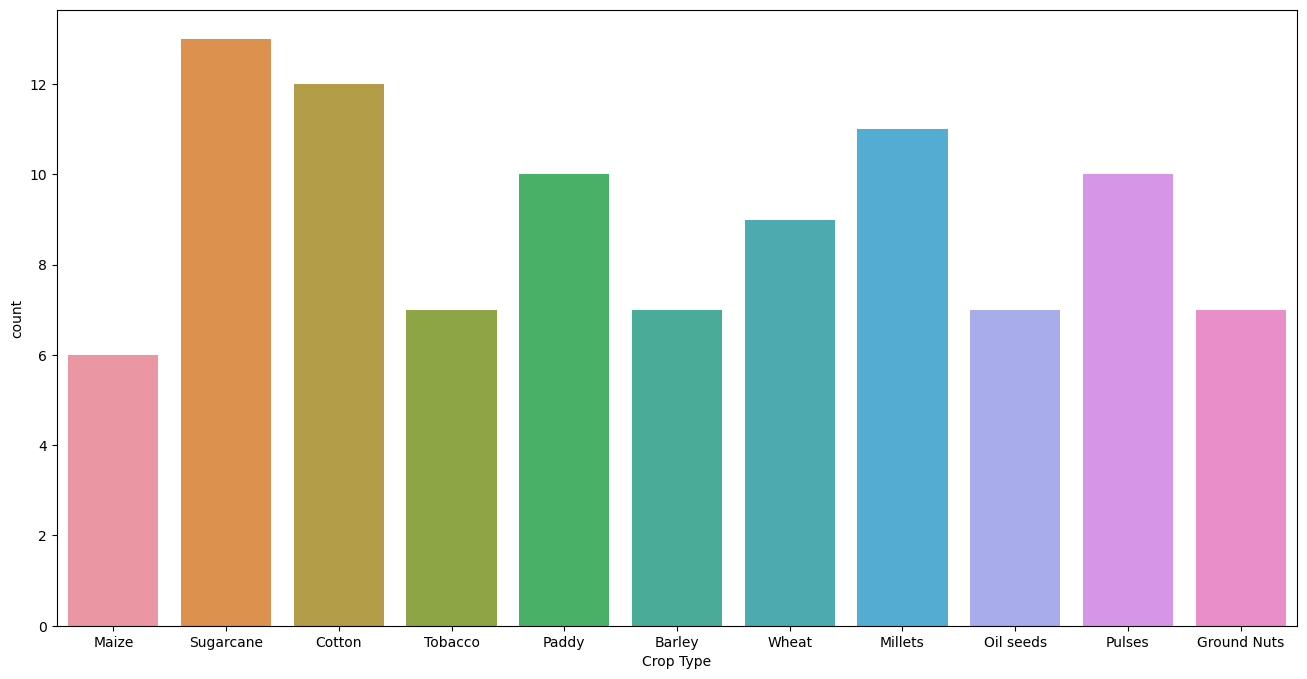

In [89]:
plt.figure(figsize=(16,8))

sns.countplot(x='Crop Type',data = data)


In [90]:
#Defining function for Continuous and catogorical variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = data['Fertilizer Name'])
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x=x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = data['Fertilizer Name'], ax=axes[1])

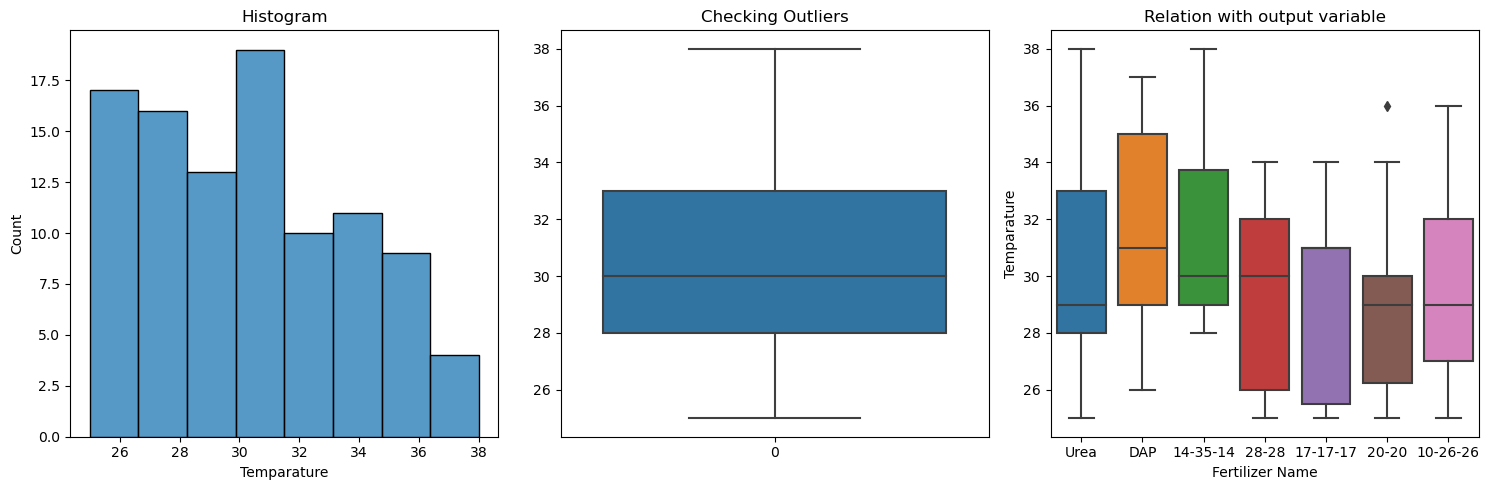

In [91]:
plot_conti(data['Temparature'])

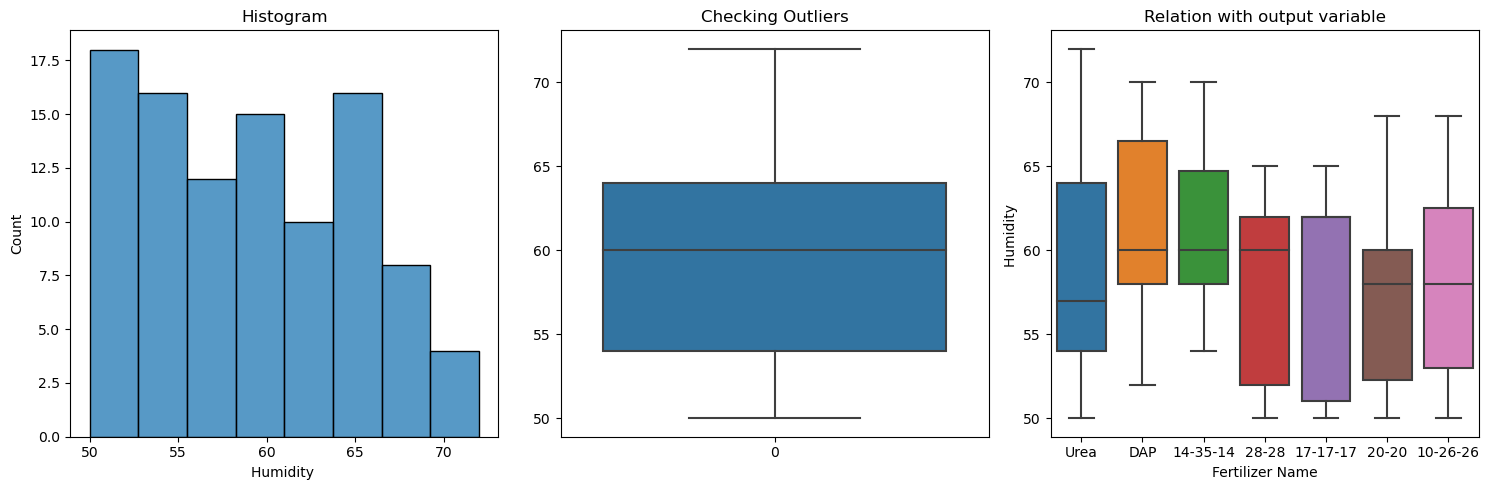

In [92]:
plot_conti(data['Humidity '])

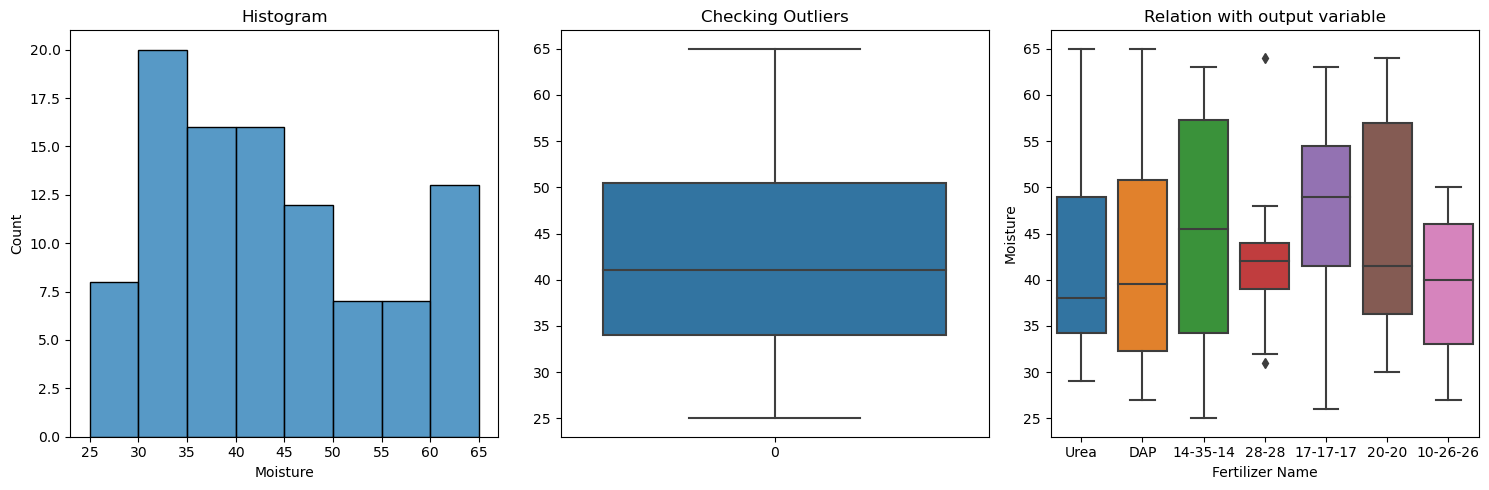

In [93]:
plot_conti(data['Moisture'])

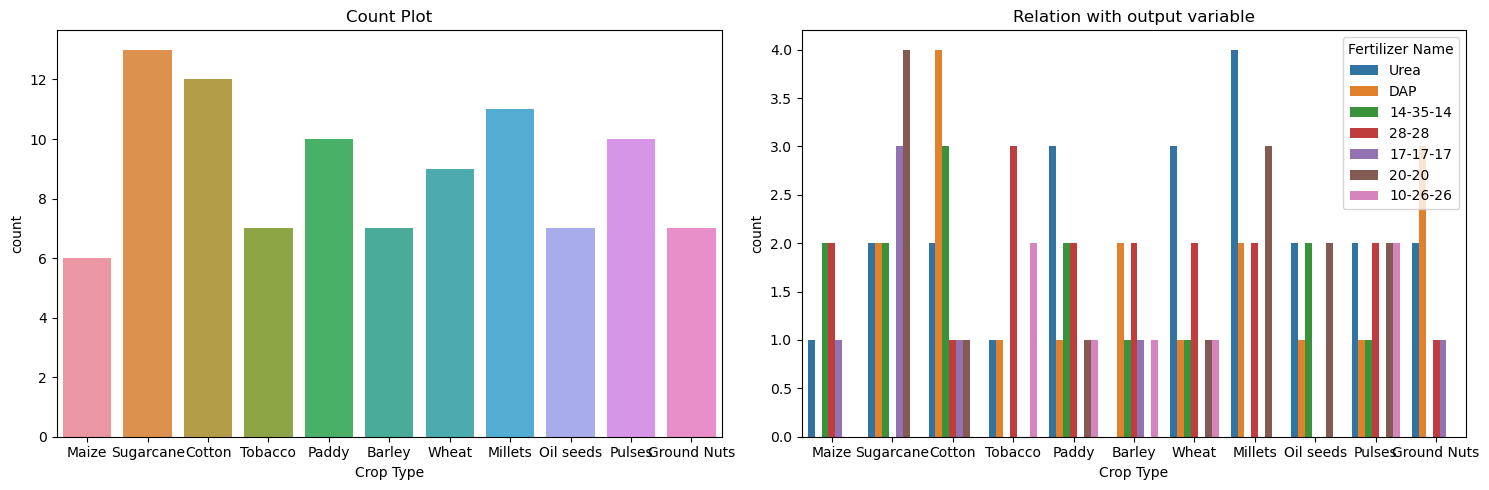

In [94]:
plot_cato(data['Crop Type'])

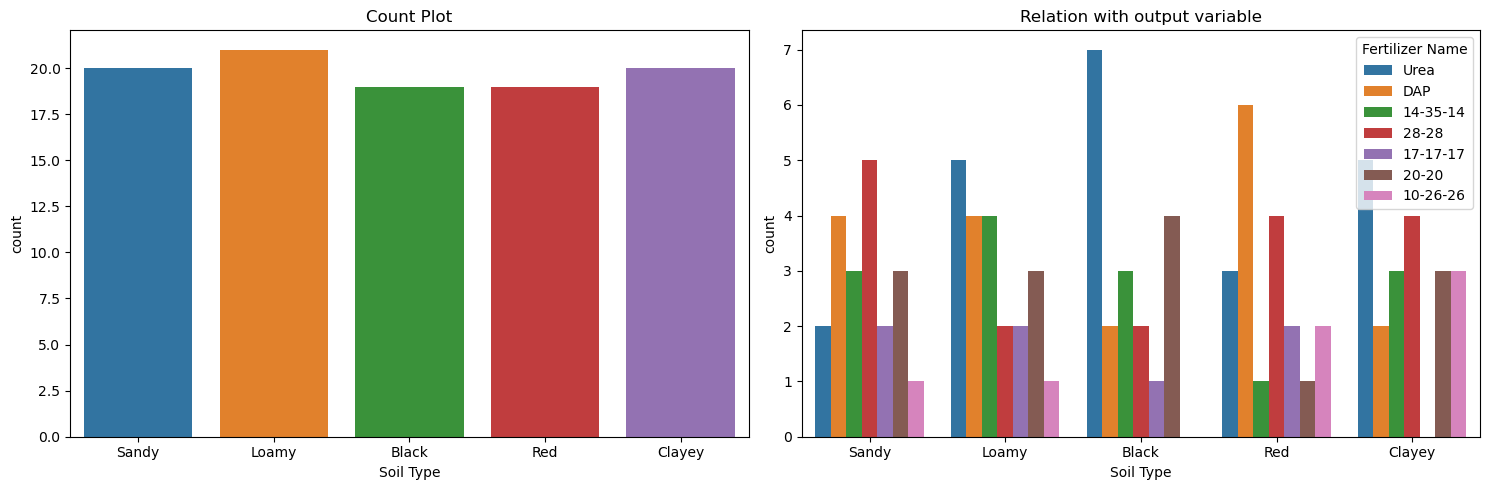

In [95]:
plot_cato(data['Soil Type'])

<Axes: xlabel='Soil Type', ylabel='Temparature'>

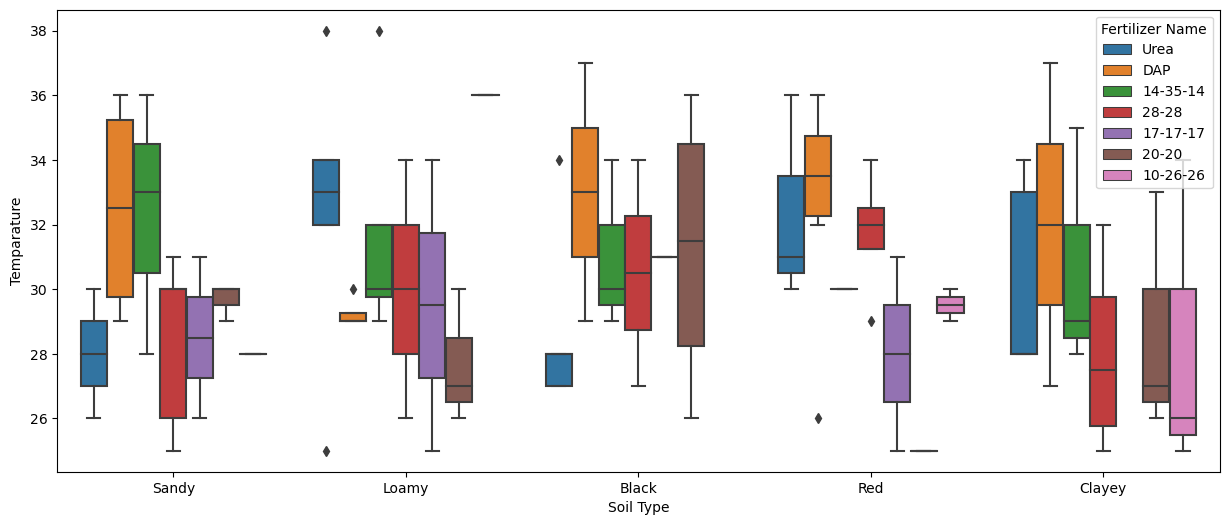

In [96]:
plt.figure(figsize=(15,6))
sns.boxplot(x=data['Soil Type'],y=data['Temparature'],hue=data['Fertilizer Name'])

<Axes: xlabel='Crop Type', ylabel='Nitrogen'>

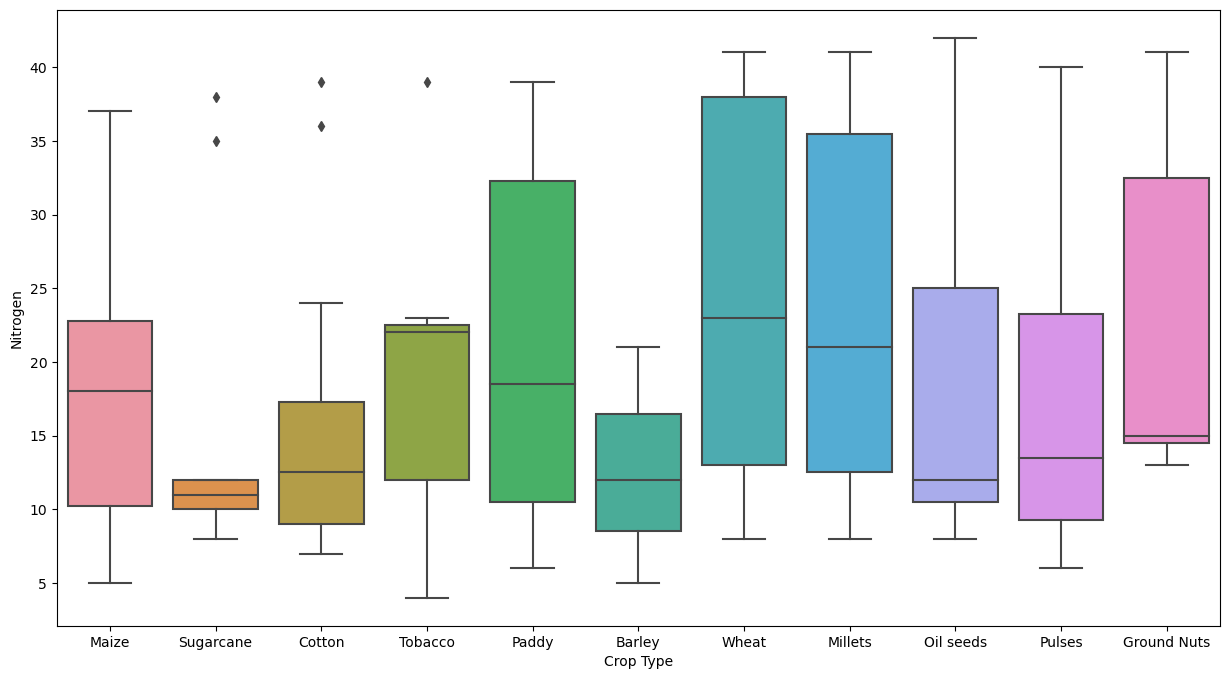

In [97]:
plt.figure(figsize=(15,8))
sns.boxplot(x=data['Crop Type'],y=data['Nitrogen'])

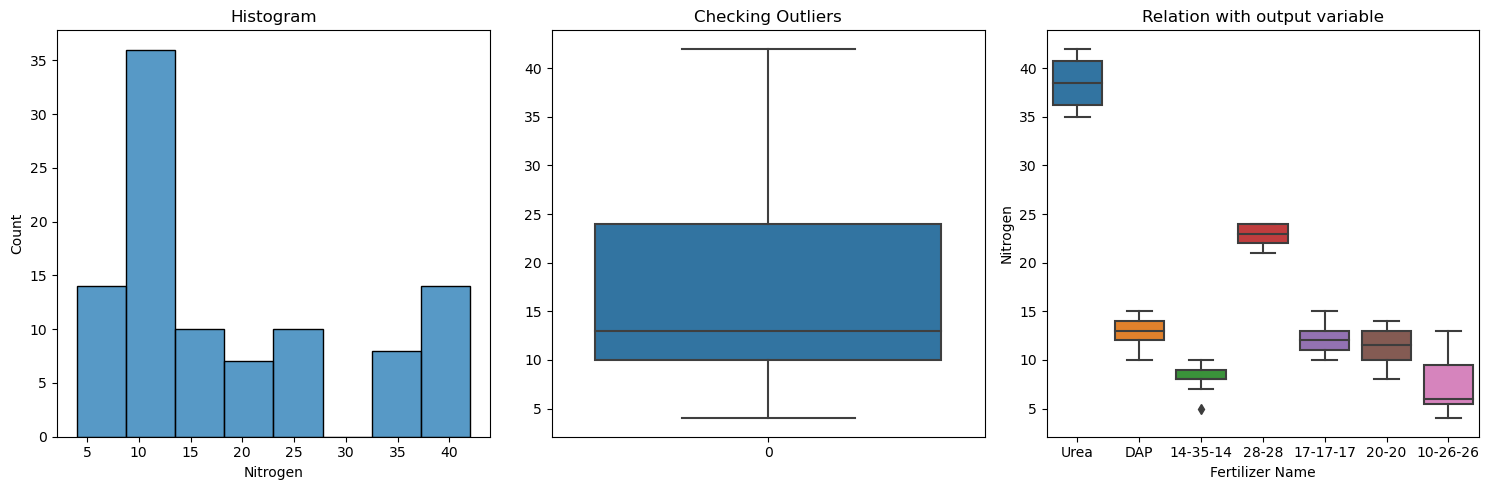

In [98]:
plot_conti(data['Nitrogen'])

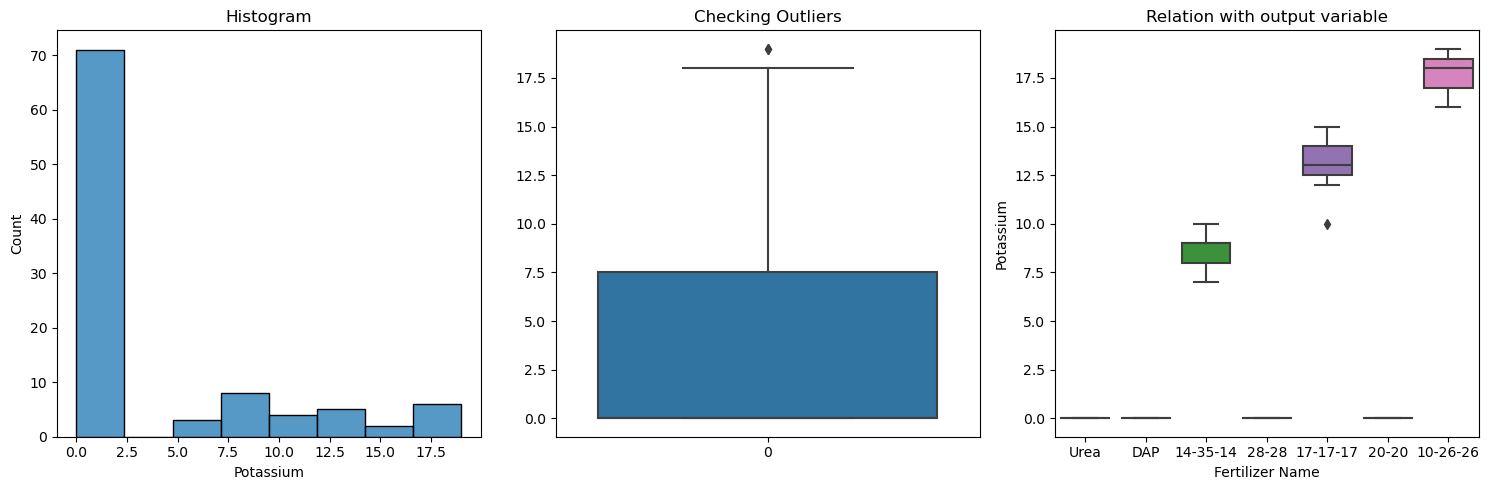

In [99]:
plot_conti(data['Potassium'])

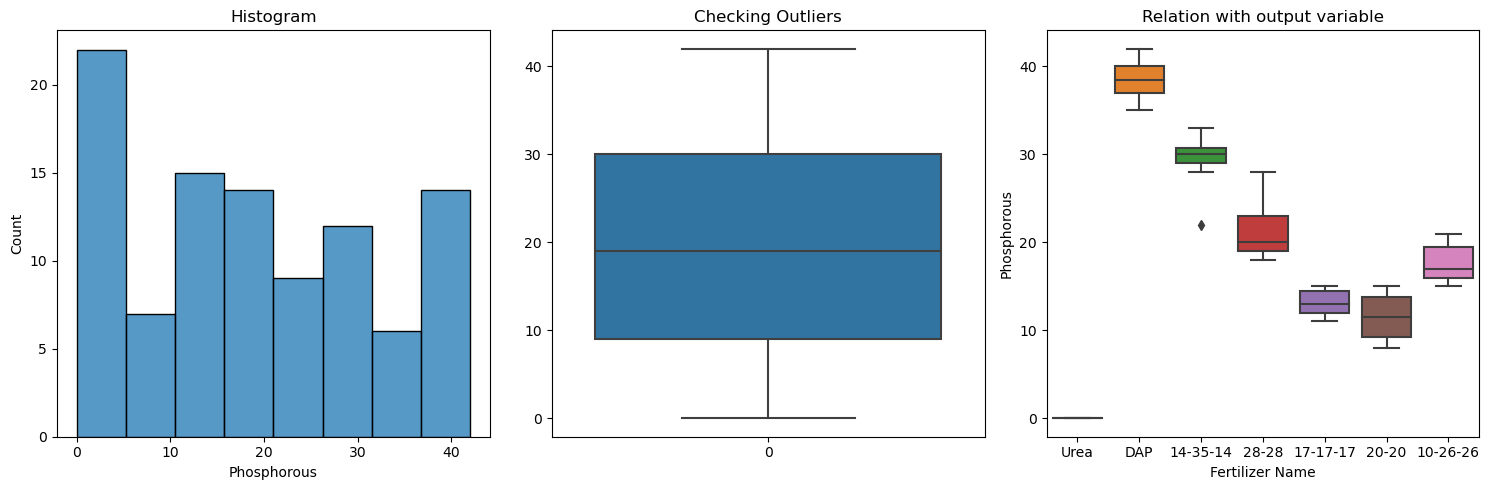

In [100]:
plot_conti(data['Phosphorous'])

Preprocessing data


In [101]:
y = data['Fertilizer Name'].copy()
X = data.drop('Fertilizer Name', axis=1).copy()

In [102]:
y

0         Urea
1          DAP
2     14-35-14
3        28-28
4         Urea
        ...   
94       28-28
95    10-26-26
96        Urea
97         DAP
98       20-20
Name: Fertilizer Name, Length: 99, dtype: object

In [103]:
X

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,Sandy,Maize,37,0,0
1,29,52,45,Loamy,Sugarcane,12,0,36
2,34,65,62,Black,Cotton,7,9,30
3,32,62,34,Red,Tobacco,22,0,20
4,28,54,46,Clayey,Paddy,35,0,0
...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19
95,30,60,27,Red,Tobacco,4,17,17
96,38,72,51,Loamy,Wheat,39,0,0
97,36,60,43,Sandy,Millets,15,0,41


In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X_dummy = np.array(ct.fit_transform(X))
ct
pd.DataFrame(X_dummy)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,26.0,52.0,38.0,37.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,29.0,52.0,45.0,12.0,0.0,36.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,34.0,65.0,62.0,7.0,9.0,30.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,32.0,62.0,34.0,22.0,0.0,20.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28.0,54.0,46.0,35.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,25.0,50.0,32.0,24.0,0.0,19.0
95,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,30.0,60.0,27.0,4.0,17.0,17.0
96,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,38.0,72.0,51.0,39.0,0.0,0.0
97,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,36.0,60.0,43.0,15.0,0.0,41.0


In [110]:
X_dummy[0]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., 26., 52., 38., 37.,  0.,  0.])

Feature Scaling

Splitting Training and Testing

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, train_size=0.8, shuffle=True, random_state=0)

In [116]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [117]:
X_train[0]

array([ 1.98431348, -0.44381268, -0.58222251, -0.44381268, -0.52363494,
       -0.25993762, -0.35856858, -0.25993762, -0.28669109, -0.35856858,
       -0.28669109, -0.28669109, -0.31180478,  2.25320285, -0.25993762,
       -0.33567254,  1.09999813,  1.05817491,  1.44545457,  1.42271137,
       -0.54183218, -1.34542799])

Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42)
classifier.fit(X_train, y_train)
#Classifier contains the model

RandomForestClassifier(random_state=42)

In [119]:
y_pred = classifier.predict(X_test)

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 4]]


1.0

In [121]:
classifier.score(X_test, y_test)



1.0

Test accuracy = 96.67%

Preprocessing using Label Encoder


In [122]:
from sklearn.preprocessing import LabelEncoder


In [123]:
#encoding Soil Type variable
encode_soil = LabelEncoder()
data['Soil Type'] = encode_soil.fit_transform(data['Soil Type'])

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [124]:
encode_crop =  LabelEncoder()
data['Crop Type'] = encode_crop.fit_transform(data['Crop Type'])

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [125]:
encode_fertilizer = LabelEncoder()
data['Fertilizer Name'] = encode_fertilizer.fit_transform(data['Fertilizer Name'])

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_fertilizer.classes_,encode_fertilizer.transform(encode_fertilizer.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [126]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer Name',axis=1),data['Fertilizer Name'],test_size=0.2,random_state=42)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 8), y_train = (79,), x_test = (20, 8), y_test = (20,)


In [127]:
x_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 49 to 51
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  79 non-null     int64
 1   Humidity     79 non-null     int64
 2   Moisture     79 non-null     int64
 3   Soil Type    79 non-null     int32
 4   Crop Type    79 non-null     int32
 5   Nitrogen     79 non-null     int64
 6   Potassium    79 non-null     int64
 7   Phosphorous  79 non-null     int64
dtypes: int32(2), int64(6)
memory usage: 4.9 KB


Random Forest Classifier


In [128]:
from sklearn.metrics import accuracy_score, classification_report

rand = RandomForestClassifier(max_depth=3,random_state=42)

rand.fit(x_train,y_train)

pred_rand = rand.predict(x_test)

print(classification_report(y_test,pred_rand))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.72      0.83      0.75        20
weighted avg       0.87      0.90      0.88        20



c:\Users\Pk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
from sklearn.model_selection import cross_val_score

cross_val_score(rand, X,y, cv=5).mean()

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Pk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Pk\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "c:\Users\Pk\anaconda3\lib\site-packages\sklearn\base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\Pk\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "c:\Users\Pk\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\Pk\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\Pk\anaconda3\lib\site-packages\pandas\core\generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Sandy'


Hyperparameter tuning with GridSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20

Best score :  0.9615384615384617
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


c:\Users\Pk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score = 97.48%

In [ ]:
y_train[2]

1